<a href="https://colab.research.google.com/github/mmarossi/Vendas_Regressao/blob/main/Total_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Estudo_Corr.xlsx to Estudo_Corr (1).xlsx


In [ ]:
nome_do_arquivo="Estudo_Corr.xlsx"
df=pd.read_excel(nome_do_arquivo)
df.head(3)

,Formato,Unidade,Regional,SIGLA,Mês,Mes2,Vendas(Mil),N_func,Venda_func,Eficiencia,Perdas,Ativos,Desligado,BancoHoras,HorasAusencia,HoraTrabalhada,Turnover,ABS,NPS
0,HIPER,Pinheiros,SP CENTRO - RG SUL,SPP,Janeiro,1,20426.30560,429,47.613766,0.149614,-1.482928,409,12,121.540000,2544.44,60467,0.029340,0.042080,1.082759
1,HIPER,Imigrantes,SP CENTRO - RG SUL,SPS,Janeiro,1,17631.01959,339,52.008907,0.153080,-1.619303,329,4,154.900000,1267.74,51152,0.012158,0.024784,0.982192
2,HIPER,Butantã,SP CENTRO - RG SUL,SPB,Janeiro,1,13649.86517,332,41.114052,0.169131,-1.712106,313,11,380.529999,2722.42,46765,0.035144,0.058215,0.842667


In [ ]:
df.describe()

,Mes2,Vendas(Mil),N_func,Venda_func,Eficiencia,Perdas,Ativos,Desligado,BancoHoras,HorasAusencia,HoraTrabalhada,Turnover,ABS,NPS
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,4.000000,9766.045480,230.963001,39.074238,0.225596,-1.260405,213.443988,6.082220,315.327102,1891.032394,33957.641316,0.030817,0.055618,1.021890
std,2.001029,5992.061215,119.533424,11.475322,0.089401,5.068417,91.255465,4.344172,341.268298,1023.106268,14192.046975,0.021384,0.020316,0.206771
min,1.000000,962.231420,57.000000,11.886290,-0.104862,-7.977539,56.000000,0.000000,0.000000,139.330002,9004.000000,0.000000,0.009504,0.441667
25%,2.000000,3811.251600,117.000000,31.117177,0.166183,-2.185511,112.000000,3.000000,70.370000,1008.399998,18652.000000,0.015873,0.041641,0.898649
50%,4.000000,9704.623590,238.000000,39.769759,0.193391,-1.643363,225.000000,5.000000,233.250000,1879.559996,35642.000000,0.027094,0.053052,1.012360
75%,6.000000,13758.660840,291.000000,47.454189,0.253690,-1.234665,278.000000,8.000000,451.520000,2545.219994,43582.000000,0.041667,0.066934,1.125843
max,7.000000,32293.054650,1073.000000,71.230858,0.707569,103.559710,464.000000,26.000000,2656.510008,7198.820016,73884.000000,0.144578,0.175645,2.445122


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Formato         973 non-null    object 
 1   Unidade         973 non-null    object 
 2   Regional        973 non-null    object 
 3   SIGLA           973 non-null    object 
 4   Mês             973 non-null    object 
 5   Mes2            973 non-null    int64  
 6   Vendas(Mil)     973 non-null    float64
 7   N_func          973 non-null    int64  
 8   Venda_func      973 non-null    float64
 9   Eficiencia      973 non-null    float64
 10  Perdas          973 non-null    float64
 11  Ativos          973 non-null    int64  
 12  Desligado       973 non-null    int64  
 13  BancoHoras      973 non-null    float64
 14  HorasAusencia   973 non-null    float64
 15  HoraTrabalhada  973 non-null    int64  
 16  Turnover        973 non-null    float64
 17  ABS             973 non-null    flo

In [ ]:
df_hiper = df[df['Formato']=='HIPER']
df_super = df[df['Formato']=='SUPER']

In [55]:
soma_mes= df.groupby('Mes2')['Vendas(Mil)'].sum()
soma_mes1= df_super.groupby('Mes2')['Vendas(Mil)'].sum()
soma_mes2= df_hiper.groupby('Mes2')['Vendas(Mil)'].sum()

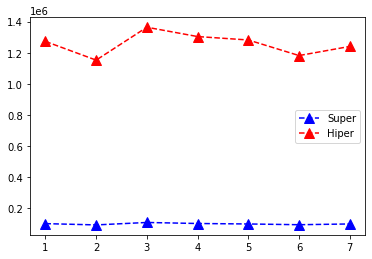

In [59]:
#comparação formato
plt.plot(soma_mes1, c='blue', ls='--', marker='^', ms=10, label='Super')
plt.plot(soma_mes2, c='red', ls='--', marker='^', ms=10, label='Hiper')
plt.legend()
plt.show()

Text(0, 0.5, 'Vendas')

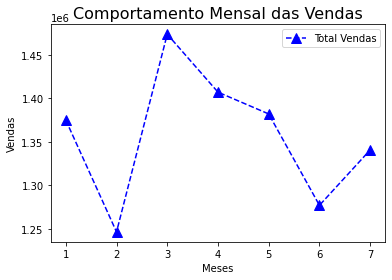

In [63]:
#comportamento total vendas
plt.plot(soma_mes, c='blue', ls='--', marker='^', ms=10, label='Total Vendas')
plt.legend()
plt.title('Comportamento Mensal das Vendas', color='black', fontsize=16)
plt.xlabel('Meses')
plt.ylabel('Vendas')

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['N_func', 'BancoHoras', 'ABS', 'Turnover','Perdas', 'Eficiencia']]
y = df['Vendas(Mil)']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

Feature: 0, Score: 26.31125
Feature: 1, Score: 1.55647
Feature: 2, Score: 13275.32656
Feature: 3, Score: -4736.82498
Feature: 4, Score: 28.26621
Feature: 5, Score: -23574.87540


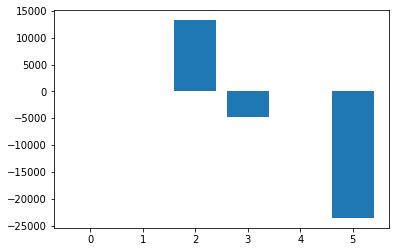

In [66]:
importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [67]:
y_pred = model.predict(X_test)

residuals = y_test - y_pred

import sklearn.metrics as metrics
# Mostrando o valor do R²
print('R² =', metrics.r2_score(y_true=y_test, y_pred=y_pred))

R² = 0.8131969035989893


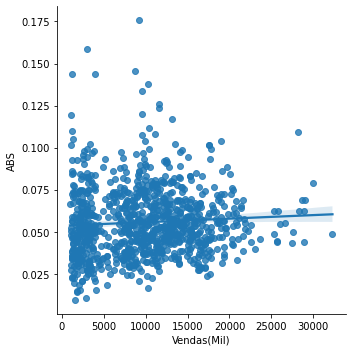

In [71]:
import seaborn as sns
sns.lmplot(x='Vendas(Mil)', y='ABS', data=df)

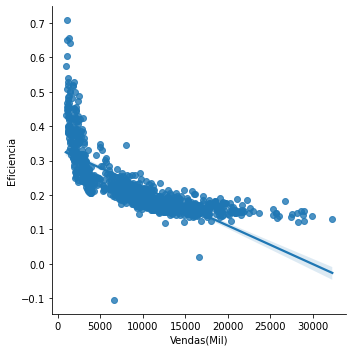

In [72]:
sns.lmplot(x='Vendas(Mil)', y='Eficiencia', data=df)

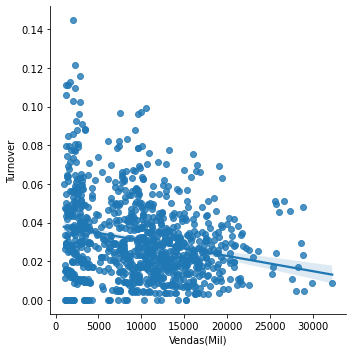

In [73]:
sns.lmplot(x='Vendas(Mil)', y='Turnover', data=df)

R² = 0.045414627485864445


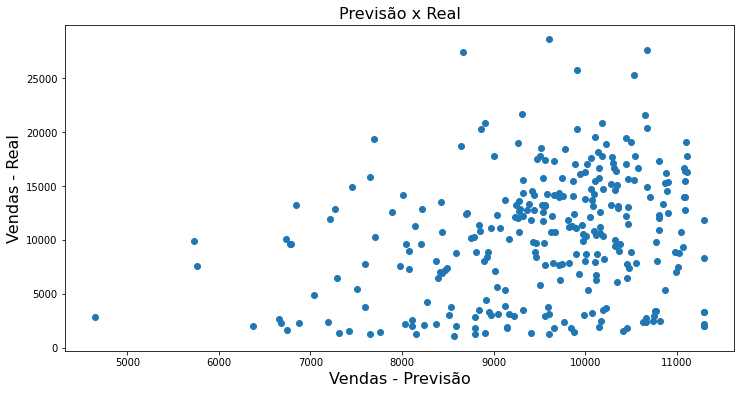

In [74]:
X = df[['Turnover']]
y = df['Vendas(Mil)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

ax = plt.scatter(y_pred, y_test)
ax.figure.set_size_inches(12, 6)
plt.title('Previsão x Real', fontdict={'fontsize': 16})
plt.xlabel('Vendas - Previsão', fontdict={'fontsize': 16})
plt.ylabel('Vendas - Real', fontdict={'fontsize': 16})
ax

# Mostrando o valor do R²
print('R² =', metrics.r2_score(y_true=y_test, y_pred=y_pred))

In [83]:
from google.colab import files
uploaded = files.upload()

Saving indicadores_economicos.xlsx to indicadores_economicos (1).xlsx


In [84]:
nome_do_arquivo="indicadores_economicos.xlsx"
df1=pd.read_excel(nome_do_arquivo)
df1.head(3)

,Mês,tx_desemp,vendas,PIB,IPCA
0,1,0.141,1.374991e+06,647092.5,0.25
1,2,0.139,1.246750e+06,670296.5,0.86
2,3,0.142,1.473482e+06,730633.7,0.93


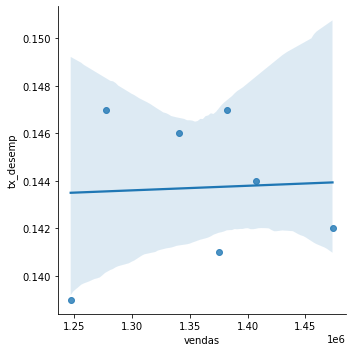

In [93]:
sns.lmplot(x='vendas', y='tx_desemp', data=df1)

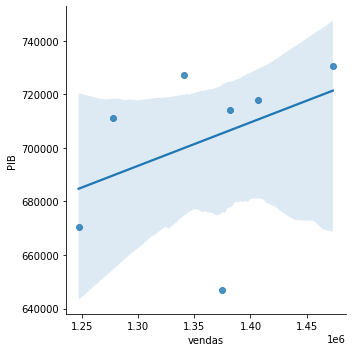

In [78]:
sns.lmplot(x='vendas', y='PIB', data=df1)

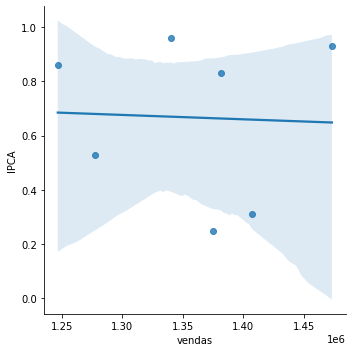

In [79]:
sns.lmplot(x='vendas', y='IPCA', data=df1)